In [22]:
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12


In [23]:
img_rows, img_cols = 28, 28

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [26]:
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#input_shape = (img_rows, img_cols, 1)
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

In [27]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
model =  tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=3)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs)
val_loss, val_acc= model.evaluate(x_test,y_test)
print( val_loss,val_acc)

Epoch 1/12
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.2556 - acc: 0.9224
Epoch 2/12
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.0915 - acc: 0.9728
Epoch 3/12
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0679 - acc: 0.9796
Epoch 4/12
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.0562 - acc: 0.9830
Epoch 5/12
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0477 - acc: 0.9854
Epoch 6/12
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.0419 - acc: 0.9867
Epoch 7/12
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.0357 - acc: 0.9887
Epoch 8/12
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.0334 - acc: 0.9898
Epoch 9/12
60000/60000 [==============================] - 124s 2ms/sample - loss: 0.0302 - acc: 0.9901
Epoch 10/12
60000/60000 [==============================] - 119s 2ms/sampl

In [30]:
model.save('num_readercnn.model')

In [31]:

new_model1 = tf.keras.models.load_model('num_readercnn.model')

In [61]:
predictions =new_model1.predict(x_test)
print(predictions)


[[3.0074250e-14 1.2582246e-08 5.2917437e-10 ... 1.0000000e+00
  1.5017062e-13 5.4899449e-09]
 [1.7404364e-12 4.6832409e-09 1.0000000e+00 ... 2.4582480e-14
  3.3779545e-14 2.4541779e-17]
 [3.1948336e-11 9.9999964e-01 9.7830699e-10 ... 2.3395738e-07
  6.4792083e-08 9.0397873e-10]
 ...
 [3.3237099e-20 4.0698417e-12 6.1435214e-17 ... 7.5165948e-14
  1.2077735e-10 8.4815105e-10]
 [3.5101420e-15 2.0375913e-15 1.7188085e-18 ... 3.3369282e-15
  6.9123325e-07 4.0905533e-13]
 [7.4601464e-11 8.5911372e-13 6.1758666e-13 ... 1.3758283e-18
  6.8796715e-09 4.0558987e-13]]


In [63]:
import numpy as np
print(np.argmax(predictions[100]))

6


In [57]:
plt.imshow(x_test[5999,1,28,28])
plt.show()

IndexError: index 28 is out of bounds for axis 2 with size 28

In [89]:
import cv2

In [90]:
img=cv2.imread('5_.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [91]:
from PIL import Image
img1 = Image.open("5_.png")
img1= img1.convert('LA')
img1.show()

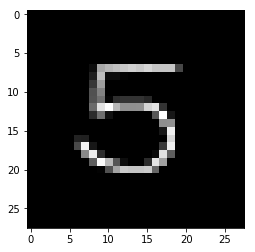

In [93]:
plt.imshow(imgarr, cmap=plt.get_cmap('gray'))


In [95]:
imgarr = np.asarray(img)
imgarr.shape
imgarr=imgarr.reshape(1,28,28,1)
#imgarr=imgarr.reshape(28,28)
imgarr.shape

(1, 28, 28, 1)

In [96]:

predictions =new_model1.predict(imgarr)
print(predictions)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [97]:
print(np.argmax(predictions))

5
